In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv(r"D:\SNU\Sem4\MLT\clsfctn\mushrooms.csv")
cols=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat','class']
df=df[cols]
df.describe()
df=df.drop("veil-type",axis=1)#as that column has only one unique value


In [3]:
#applying label encoding
from sklearn.preprocessing import LabelEncoder
labenc=LabelEncoder()
for col in df.columns:
    df[col] = labenc.fit_transform(df[col])


In [4]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0)
from sklearn.metrics import classification_report,accuracy_score


In [5]:
#scaling the data to use it for certain classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()
mm = MinMaxScaler()
xtrain1 = mm.fit_transform(xtrain)
xtest1 = mm.transform(xtest)

## Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)
print(classification_report(ytest,ypred))
print("Logistic regression accuracy Score:",accuracy_score(ytest,ypred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1061
           1       0.96      0.94      0.95       970

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031

Logistic regression accuracy Score: 0.9507631708517972


## Naive Bayes Classifier


In [7]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(xtrain,ytrain)
ypred=nb.predict(xtest)
print(classification_report(ytest,ypred))
print("Naive bayes accuracy Score:",accuracy_score(ytest,ypred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1061
           1       0.90      0.92      0.91       970

    accuracy                           0.91      2031
   macro avg       0.91      0.91      0.91      2031
weighted avg       0.91      0.91      0.91      2031

Naive bayes accuracy Score: 0.914327917282127


## KNN classifier

In [8]:
nn = KNeighborsClassifier(n_neighbors=50)
nn.fit(xtrain1,ytrain)
ypred=nn.predict(xtest1)
print(classification_report(ytest,ypred))
print("KNN accuracy Score:",accuracy_score(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1061
           1       1.00      0.99      0.99       970

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031

KNN accuracy Score: 0.9931068439192516


C:\Users\Harip\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Decision tree classifier

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1061
           1       1.00      1.00      1.00       970

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

Decision tree accuracy: 0.999015263417036


[Text(0.27941176470588236, 0.9285714285714286, 'X[8] <= 0.045\nentropy = 0.999\nsamples = 6093\nvalue = [3147, 2946]'),
 Text(0.22058823529411764, 0.7857142857142857, 'entropy = 0.0\nsamples = 1302\nvalue = [0, 1302]'),
 Text(0.3382352941176471, 0.7857142857142857, 'X[18] <= 0.188\nentropy = 0.928\nsamples = 4791\nvalue = [3147, 1644]'),
 Text(0.11764705882352941, 0.6428571428571429, 'X[4] <= 0.438\nentropy = 0.321\nsamples = 1248\nvalue = [73, 1175]'),
 Text(0.058823529411764705, 0.5, 'entropy = 0.0\nsamples = 1175\nvalue = [0, 1175]'),
 Text(0.17647058823529413, 0.5, 'entropy = 0.0\nsamples = 73\nvalue = [73, 0]'),
 Text(0.5588235294117647, 0.6428571428571429, 'X[7] <= 0.5\nentropy = 0.564\nsamples = 3543\nvalue = [3074, 469]'),
 Text(0.29411764705882354, 0.5, 'X[18] <= 0.562\nentropy = 0.184\nsamples = 2979\nvalue = [2896, 83]'),
 Text(0.23529411764705882, 0.35714285714285715, 'entropy = 0.0\nsamples = 2464\nvalue = [2464, 0]'),
 Text(0.35294117647058826, 0.35714285714285715, 'X[10]

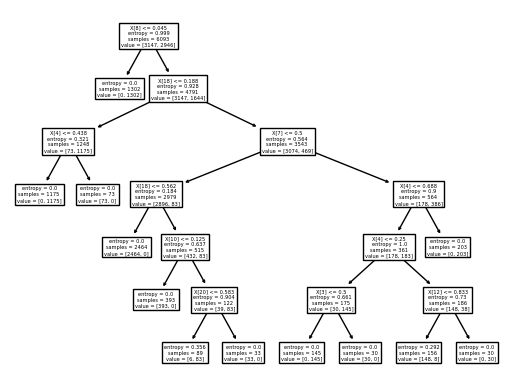

In [35]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
dtree= DecisionTreeClassifier(criterion='entropy',max_depth=6)
dtree.fit(xtrain1,ytrain)
ypred=dtree.predict(xtest1)
print(classification_report(ytest,ypred))
print("Decision tree accuracy:",accuracy_score(ytest,ypred))
plot_tree(dtree)

## SVM classifier

In [34]:
from sklearn.svm import SVC
svc=SVC(max_iter=30)
svc.fit(xtrain,ytrain)
ypred=svc.predict(xtest)
print(classification_report(ytest,ypred))
print("SVC accuracy Score:",accuracy_score(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1061
           1       0.99      0.99      0.99       970

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031

SVC accuracy Score: 0.9931068439192516


C:\Users\Harip\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


## Random forest classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=20,criterion='gini',max_depth=6)
rfc.fit(xtrain1,ytrain)
ypred=rfc.predict(xtest1)
print(classification_report(ytest,ypred))
print("Random forest classifier accuracy Score:",accuracy_score(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1061
           1       1.00      0.98      0.99       970

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031

Random forest classifier accuracy Score: 0.9921221073362876


## Boosting-AdaBoost 

In [40]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=20)
ada.fit(xtrain1,ytrain)
ypred=ada.predict(xtest1)
print(classification_report(ytest,ypred))
print("AdaBoost classifier accuracy Score:",accuracy_score(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1061
           1       1.00      1.00      1.00       970

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

AdaBoost classifier accuracy Score: 0.999015263417036


## For the given data: 
### Naive bayes gives least accuracy followed by logistic regression which gives the second least
### Rest of the algorithms give an accuracy of 99% and above for the same value of parameters
### Further, decision tree and AdaBoost give the maximum accuracy of 99.9%
